In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv("spam.csv", encoding = "latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
# drop unnamed columns
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
data.shape

(5572, 2)

In [55]:
# renaming columns
data = data.rename(columns = {"v1": "labels", "v2": "message"})
data.columns

Index(['labels', 'message'], dtype='object')

In [56]:
data.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
data.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [58]:
data['len'] = data['message'].str.len()
data.head(10)

,labels,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [59]:
data.tail(10)

,labels,message,len
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,96
5563,ham,Ard 6 like dat lor.,19
5564,ham,Why don't you wait 'til at least wednesday to ...,67
5565,ham,Huh y lei...,12
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


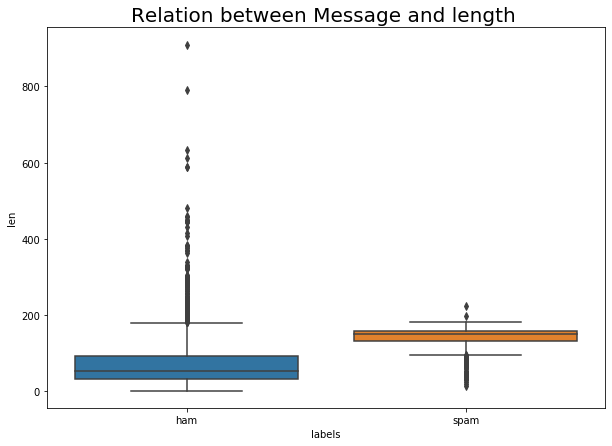

In [60]:
plt.rcParams['figure.figsize'] = (10,7)
sns.boxplot(x = data['labels'], y = data['len'])
plt.title("Relation between Message and length ", fontsize = 20)
plt.show()

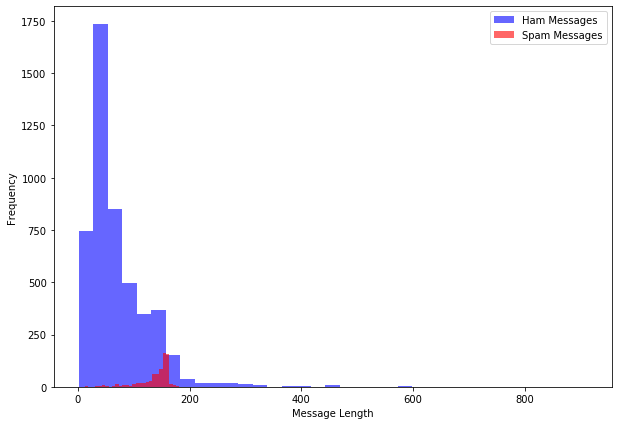

In [61]:
# Message length
plt.figure(figsize=(10,7))

data[data.labels == 'ham'].len.plot(bins=35,kind = 'hist', color = 'blue', label='Ham Messages', alpha=0.6)
data[data.labels == 'spam'].len.plot(bins=35,kind ='hist',color='red',label='Spam Messages', alpha = 0.6)
plt.legend()
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

In [62]:
#describing the labels
data.groupby('labels').describe()

len                                                         
         count        mean        std   min    25%    50%    75%    max
labels                                                                 
ham     4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam     747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

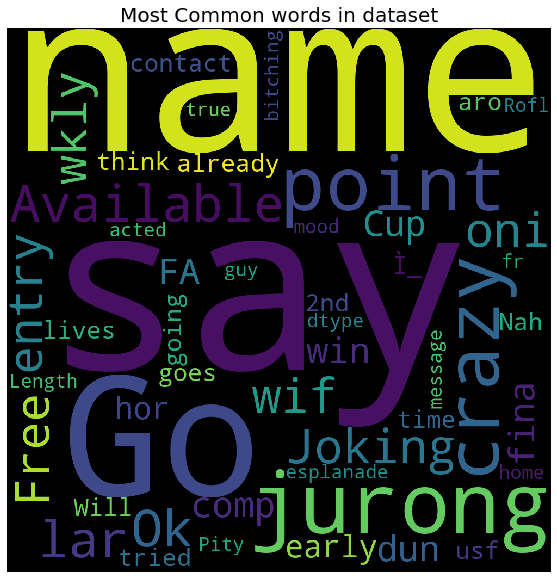

In [63]:
# checking the most common words in dataset
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'black', width=1000, height = 1000, max_words = 50).generate(str(data['message']))

plt.rcParams['figure.figsize'] = (10,10)
plt.title("Most Common words in dataset", fontsize = 20)
plt.axis("off")
plt.imshow(wordcloud)

In [64]:
data['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

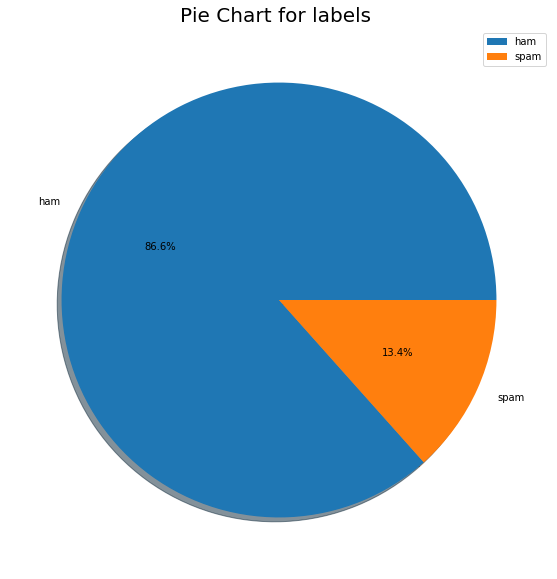

In [65]:
size = [4825,747]
labels = ["ham","spam"]

plt.pie(size,labels = labels,shadow = True, autopct = '%.1f%%')
plt.axis("off")
plt.title("Pie Chart for labels ",fontsize = 20)
plt.legend()
plt.show()

In [66]:
# replacing ham and spam with 0 and 1
data['labels'].replace('ham',0,inplace=True)
data['labels'].replace('spam',1,inplace=True)


In [67]:
data.head()

,labels,message,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


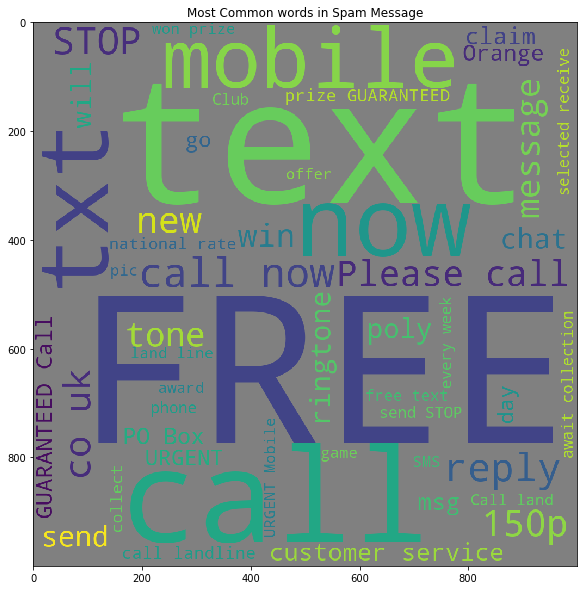

In [68]:
# checking most common words in spam messages

spam = ' '.join(text for text in data['message'][data['labels'] == 1])

wordcloud = WordCloud(background_color = 'gray', max_words = 50,height = 1000, width = 1000).generate(spam)
plt.rcParams['figure.figsize'] = (10,10)
plt.title("Most Common words in Spam Message")
plt.imshow(wordcloud)

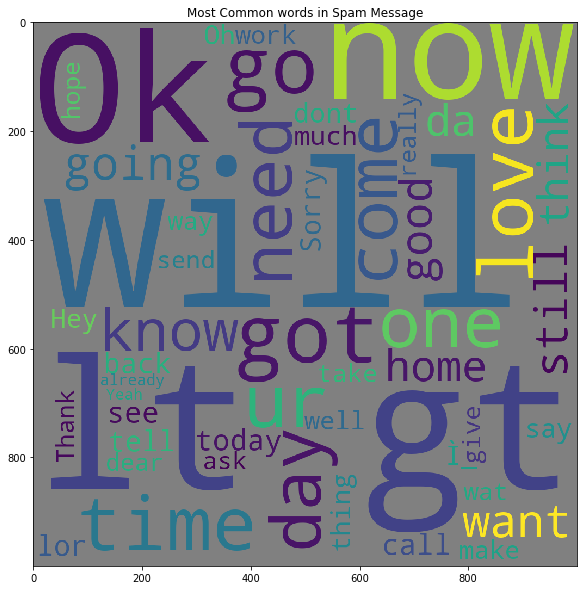

In [69]:
# checking most common words in ham messages

ham = ' '.join(text for text in data['message'][data['labels'] == 0])

wordcloud = WordCloud(background_color = 'gray', max_words = 50,height = 1000, width = 1000).generate(ham)
plt.rcParams['figure.figsize'] = (10,10)
plt.title("Most Common words in Spam Message")
plt.imshow(wordcloud)

In [70]:
data.head()

,labels,message,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Text Preprocessing

Remove Stopwords

Remove Punctuations

Return a list with clean text

In [71]:
import string
from nltk.corpus import stopwords

def cleandata(sent):
    """
    Takes string and perform following:
    1: Remove punctuation
    2: Remove stopwords
    3: Returns a list with clean text
    """
    
    stop = stopwords.words('english')
    
    # remove punctuations
    cleanpunc = [char for char in sent if char not in string.punctuation]
    
    # join characters again to form string
    cleanpunc = ''.join(cleanpunc)
    
    # remove stopwords
    return ' '.join([word for word in cleanpunc.split() if word.lower() not in stop])

In [72]:
data.head()

,labels,message,len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [73]:
data['clean_msg'] = data.message.apply(cleandata)

In [74]:
data.head()

,labels,message,len,clean_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


In [82]:
from collections import Counter

words = data[data.labels==0].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('u', 972), ('im', 449), ('2', 305), ('get', 303), ('ltgt', 276), ('ok', 272), ('dont', 257), ('go', 247), ('ur', 240), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('4', 168), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100)]


In [83]:
words = data[data.labels == 1].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('2', 173), ('txt', 150), ('u', 147), ('ur', 144), ('mobile', 123), ('text', 120), ('4', 119), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30)]


In [84]:
data.head(3)

,labels,message,len,clean_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...


In [108]:
X = data.clean_msg
y = data.labels
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [109]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4179,) (1393,) (4179,) (1393,)


In [110]:
# BOW
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [111]:
X_train_dtm = vect.transform(X_train)

In [113]:
X_train_dtm

<4179x7963 sparse matrix of type '<class 'numpy.int64'>'
	with 35455 stored elements in Compressed Sparse Row format>

In [115]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7963 sparse matrix of type '<class 'numpy.int64'>'
	with 10269 stored elements in Compressed Sparse Row format>

In [116]:
# Building model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [117]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 9.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [118]:
y_pred = nb.predict(X_test_dtm)

In [119]:
from sklearn import metrics 
metrics.accuracy_score(y_test,y_pred)

0.9806173725771715

In [121]:
# print confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1190,   10],
       [  17,  176]], dtype=int64)

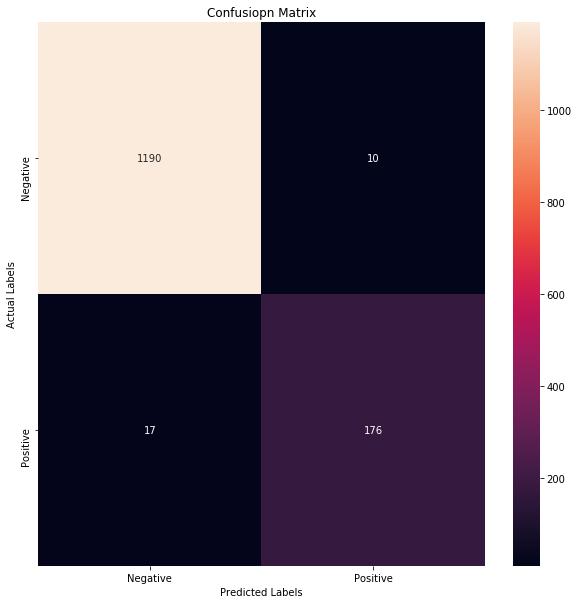

In [122]:
import seaborn as sns
class_label = ["Negative","Positive"]
df_cm = pd.DataFrame(cm, index= class_label, columns = class_label)
sns.heatmap(df_cm,annot=True,fmt="d")
plt.title("Confusiopn Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [124]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1200
           1       0.95      0.91      0.93       193

    accuracy                           0.98      1393
   macro avg       0.97      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393

